In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Exploratory data analysis

In [6]:
#Import data
df = pd.read_csv('datasets/gm_2008_region.csv')
#Exploratory data analysis
display(df.info())
display(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


None

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


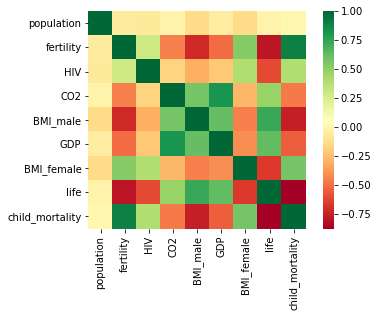

In [7]:
#Correlation matrix
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

## Linear Regression

0.6192442167740037

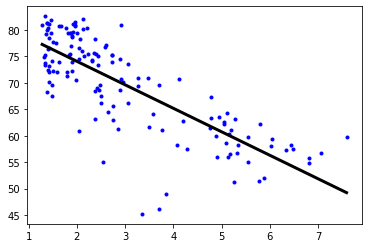

In [71]:
#Pick variables
y = df.life.to_numpy().reshape(-1, 1)
X = df.fertility.to_numpy().reshape(-1, 1)

#Fit Linear Regression Model
reg = LinearRegression()
reg.fit(X, y)

prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Predict
y_pred = reg.predict(prediction_space)
 
display(reg.score(X, y))

plt.plot(X,y,color='blue',marker='.', linestyle='None')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

## Train / Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
#Fit regression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# Predict on the test data
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907498
Root Mean Squared Error: 4.194027914110239


## Cross validation

In [23]:
cv_scores = cross_val_score(reg, X, y, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


## Regularization

In [64]:
X = df.drop(['life','Region'],axis=1).to_numpy()
y = df.life.to_numpy()

from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lasso = Lasso(alpha = 0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.872129616961354

In [65]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -5.70963416e-01,  0.00000000e+00,
        2.73379527e-01,  8.86039470e-05, -1.68360836e-01, -9.61558363e-02])

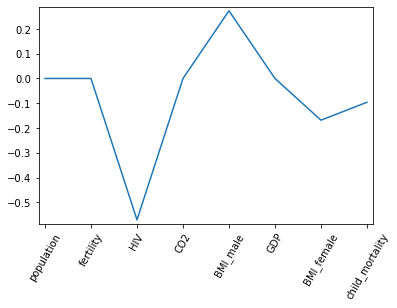

In [67]:
# Plot the coefficients
df_columns = df.drop(['life','Region'],axis=1).columns

plt.plot(range(len(df_columns)), lasso.coef_)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.8442469959975749

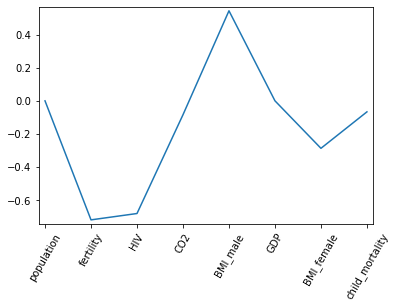

In [69]:
plt.plot(range(len(df_columns)), ridge.coef_)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

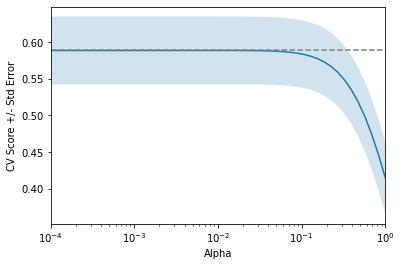

In [72]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alpha_space, ridge_scores)
std_error = ridge_scores_std / np.sqrt(10)

ax.fill_between(alpha_space, ridge_scores + std_error, ridge_scores - std_error, alpha=0.2)
ax.set_ylabel('CV Score +/- Std Error')
ax.set_xlabel('Alpha')
ax.axhline(np.max(ridge_scores), linestyle='--', color='.5')
ax.set_xlim([alpha_space[0], alpha_space[-1]])
ax.set_xscale('log')
plt.show()